In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
df = pd.read_csv('../inputs/day.csv')
df.shape

(730, 16)

The dataset composed of 730 records and 16 features

Explore features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The dataset is clean with no missing values

In [12]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Year: {0, 1}

The year variable is binary encoded where 0 and 1 means records are from year 2018 and 2019 respectively.

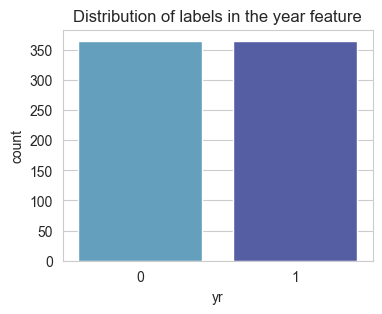

In [11]:
plt.figure(figsize = (4, 3))
sns.countplot(data = df, x = 'yr')
plt.title('Distribution of labels in the year feature')
plt.show()

We have 365 records from each year and they might corresponds to end of the day observations

#### Season

season (1:spring, 2:summer, 3:fall, 4:winter)


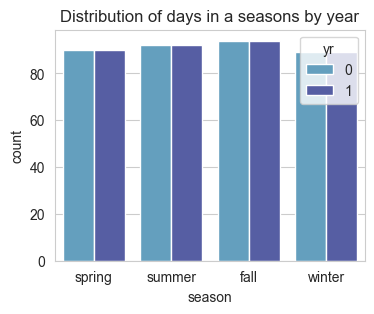

In [36]:
plt.figure(figsize = (4, 3))
sns.countplot(data = df, x = 'season', hue = 'yr')
plt.xticks(ticks = [0, 1, 2, 3], labels = ['spring', 'summer', 'fall', 'winter'])
plt.title('Distribution of days in a seasons by year')
plt.show()

There is no suprise that the season days across the years is same.

#### Holiday

holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

In [21]:
for lbl, yr in zip([0, 1], [2018, 2019]):
    print(f'Holiday split in year {yr}:', dict(df[df['yr'] == lbl]['holiday'].value_counts()))

Holiday split in year 2018: {0: 355, 1: 10}
Holiday split in year 2019: {0: 354, 1: 11}


#### weathersit 
- `1`: Clear, Few clouds, Partly cloudy, Partly cloudy
- `2`: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- `3`: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- `4`: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

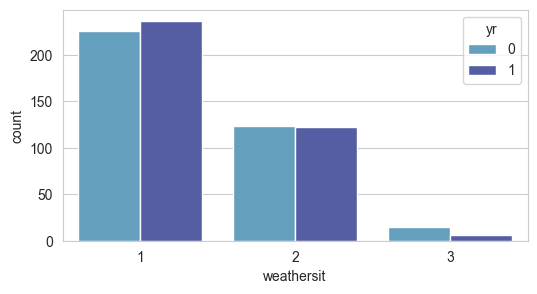

In [22]:
plt.figure(figsize = (6, 3))
sns.countplot(data = df, x = 'weathersit', hue = 'yr')
plt.show()

- There is no heavy-rain days between the two year the data was compiled.
- Little more than 97% of the days accross the two years, the weather was conducive for a bike raiders. Only 21 days, the weather situtation was under label 3 with light snow, light rain + thunderstorm (etc)

#### Temp - temperature in Celsius

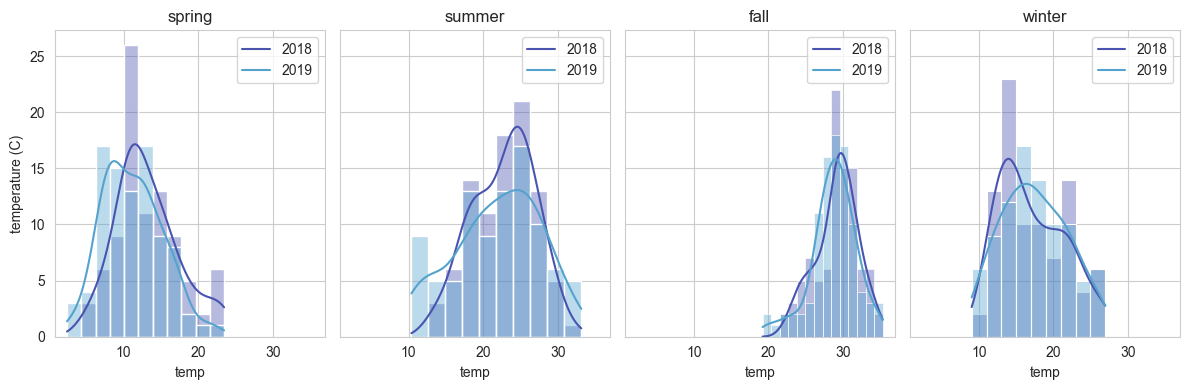

In [46]:
# distribution of temperature across the seasons and years
season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
yr_dict = {0: 2018, 1: 2019}

fig, axes = plt.subplots(1, len(season_dict), figsize=(12, 4), sharey=True, sharex = True)
for idx, ax in enumerate(axes.flatten()):
    sns.histplot(data = df[df['season'] == (idx + 1)], x = 'temp', hue = 'yr', ax = ax, kde = True, alpha = 0.4)
    ax.legend([2018, 2019])
    ax.set_title(season_dict[idx+1])
    ax.set_ylabel('temperature (C)')

plt.tight_layout()

The range in temperatures in summer and winter are nearly same between 10 and 32C, however in the summer it right skewed towards the higher end, while left skewed in the winter. In the fall, the daily temperatures are warmer between 20 and 30C. In spring the pattern inverses with much lower temperture into single digits.

#### atemp: feeling temperature in Celsius

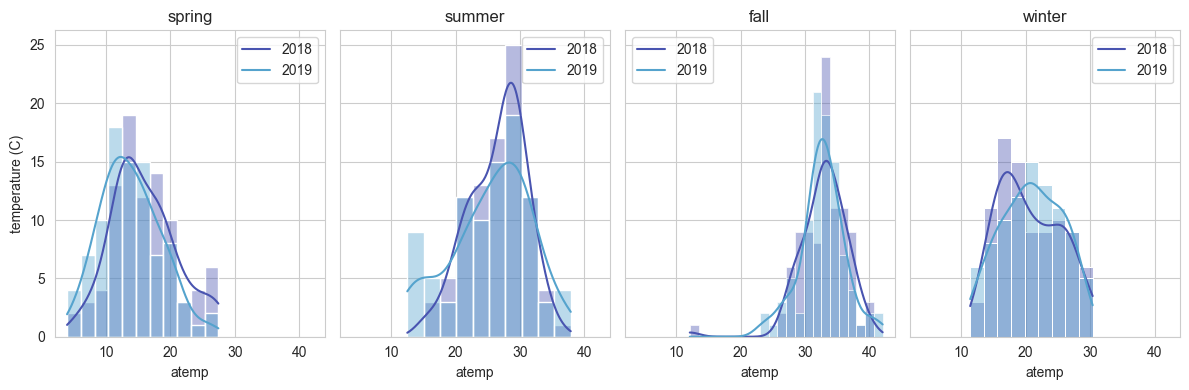

In [47]:
# distribution of temperature across the seasons and years
season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
yr_dict = {0: 2018, 1: 2019}

fig, axes = plt.subplots(1, len(season_dict), figsize=(12, 4), sharey=True, sharex = True)
for idx, ax in enumerate(axes.flatten()):
    sns.histplot(data = df[df['season'] == (idx + 1)], x = 'atemp', hue = 'yr', ax = ax, kde = True, alpha = 0.4)
    ax.legend([2018, 2019])
    ax.set_title(season_dict[idx+1])
    ax.set_ylabel('temperature (C)')

plt.tight_layout()

The trends in feel-tempeatures are not much different to the actual temperature

#### Difference in temps (atemp - temp)

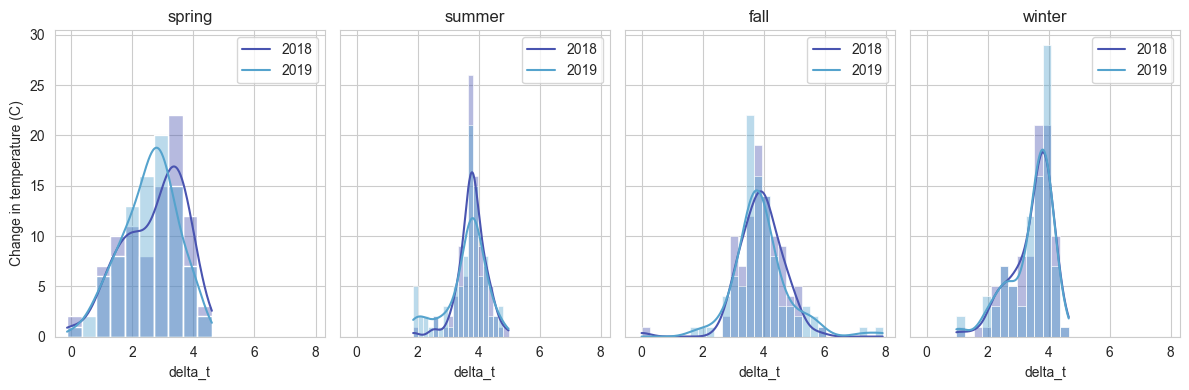

In [54]:
df['delta_t'] = df['atemp'] - df['temp']

### THERE IS ONE WHERE THE DIFFERENCE IN TEMP IS -17.536653. It might be due to some artifact.
df.loc[df['delta_t'] < -10, 'delta_t'] = 0

# distribution of temperature across the seasons and years
season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
yr_dict = {0: 2018, 1: 2019}

fig, axes = plt.subplots(1, len(season_dict), figsize=(12, 4), sharey=True, sharex = True)
for idx, ax in enumerate(axes.flatten()):
    sns.histplot(data = df[df['season'] == (idx + 1)], x = 'delta_t', hue = 'yr', ax = ax, kde = True, alpha = 0.4)
    ax.legend([2018, 2019])
    ax.set_title(season_dict[idx+1])
    ax.set_ylabel('Change in temperature (C)')

plt.tight_layout()

The difference in feeling temperature and the actual temperature is betwee 0-8C. In the summer and fall, the distribution is normal, while in the spring and winter, it is skewed right centered around 4C.

In [56]:
# we can remove either of the registered or casual features as total riders = registered + casual
sum(df['cnt'] == df['registered'] + df['casual']) == len(df)

True